In [113]:
import pandas as pd # type: ignore
house_dataset = pd.read_csv('kc_house_data.csv')

In [114]:
house_dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<Axes: xlabel='price', ylabel='sqft_living'>

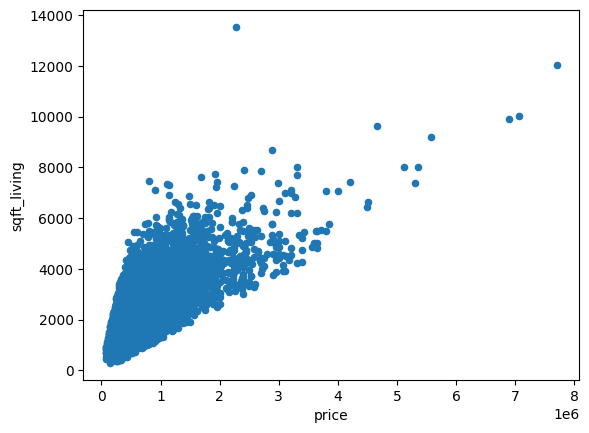

In [115]:
house_dataset.plot.scatter(x = "price", y= "sqft_living")

In [116]:
target = ["price"]
features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors",
            "grade","yr_built","waterfront","view","condition","grade",
            "sqft_above","sqft_basement"]

all_selected = target + features

house_dataset_subset = house_dataset[all_selected]

house_dataset_subset

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,yr_built,waterfront,view,condition,grade,sqft_above,sqft_basement
0,221900.0,3,1.00,1180,5650,1.0,7,1955,0,0,3,7,1180,0
1,538000.0,3,2.25,2570,7242,2.0,7,1951,0,0,3,7,2170,400
2,180000.0,2,1.00,770,10000,1.0,6,1933,0,0,3,6,770,0
3,604000.0,4,3.00,1960,5000,1.0,7,1965,0,0,5,7,1050,910
4,510000.0,3,2.00,1680,8080,1.0,8,1987,0,0,3,8,1680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,8,2009,0,0,3,8,1530,0
21609,400000.0,4,2.50,2310,5813,2.0,8,2014,0,0,3,8,2310,0
21610,402101.0,2,0.75,1020,1350,2.0,7,2009,0,0,3,7,1020,0
21611,400000.0,3,2.50,1600,2388,2.0,8,2004,0,0,3,8,1600,0


In [117]:
from sklearn.model_selection import train_test_split # type: ignore

train, test = train_test_split(house_dataset_subset, test_size=0.25)

In [118]:
train.shape

(16209, 14)

In [119]:
test.shape

(5404, 14)

In [120]:
train_X = train[features]
train_y = train[target].to_numpy()

test_X = test[features]
test_y = test[target].to_numpy()

In [121]:
train_X.shape

(16209, 15)

In [122]:
train_y.shape

(16209, 1)

In [123]:
test_X.shape

(5404, 15)

In [124]:
test_y.shape

(5404, 1)

In [125]:
from sklearn.linear_model import LinearRegression # type: ignore

LR_model = LinearRegression()

In [126]:
LR_model.fit(train_X,train_y)

LinearRegression()

In [127]:
predictions_on_test_set = LR_model.predict(test_X)

In [128]:
print("First prediction: "+str(predictions_on_test_set[0]))
print("First target: "+str(test_y[0]))
print("Second prediction: "+str(predictions_on_test_set[1]))
print("Second target: "+str(test_y[1]))
print("Third prediction: "+str(predictions_on_test_set[2]))
print("Third target: "+str(test_y[2]))

First prediction: [384159.96127354]
First target: [610000.]
Second prediction: [241324.28609513]
Second target: [156000.]
Third prediction: [876860.70327329]
Third target: [1047500.]


In [129]:
from sklearn.metrics import mean_squared_error, r2_score # type: ignore

print('Mean squared error: %.2f'
      % mean_squared_error(test_y, predictions_on_test_set))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(test_y, predictions_on_test_set))

Mean squared error: 44893609220.06
Coefficient of determination: 0.66


In [130]:
house_dataset['is_modern'] = house_dataset['yr_built'].gt(1980).astype(int)
house_dataset

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,is_modern
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,1
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,1
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,1
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,1


In [131]:
target = ["is_modern"]
features = ["bedrooms","bathrooms","sqft_living","sqft_lot","floors",
            "grade","waterfront","view","condition","grade",
            "sqft_above","sqft_basement"]

all_selected = target + features

classification_house_dataset_subset = house_dataset[all_selected]

train, test = train_test_split(classification_house_dataset_subset, test_size=0.25)

train_X = train[features]
train_y = train[target].values.ravel()

test_X = test[features]
test_y = test[target].values.ravel()

In [132]:
train_X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,grade,waterfront,view,condition,grade,grade,sqft_above,sqft_basement
7479,3,2.50,1710,12677,2.0,8,8,0,0,3,8,8,1710,0
4596,3,1.75,1540,6909,1.0,7,7,0,0,4,7,7,920,620
9884,4,2.50,2360,9647,1.0,8,8,0,2,3,8,8,1530,830
2443,3,1.00,1090,3315,1.0,6,6,0,0,4,6,6,1090,0
7801,3,2.50,2020,4183,2.0,7,7,0,0,3,7,7,2020,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,4,2.50,3210,8532,2.0,10,10,0,0,3,10,10,3210,0
5060,3,2.00,1760,9055,2.0,7,7,0,0,4,7,7,1760,0
15687,3,2.50,3400,38400,1.0,8,8,0,4,3,8,8,1870,1530
16639,3,2.25,2730,7521,2.0,9,9,0,2,3,9,9,2730,0


In [133]:
train_y

array([1, 0, 0, ..., 0, 1, 1])

In [134]:
from sklearn.linear_model import LogisticRegression # type: ignore

lg_classifier = LogisticRegression()

lg_classifier.fit(train_X,train_y)

lg_classifier.score(test_X,test_y)

C:\Users\adamt\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8747224278312361

In [ ]:
import pandas as pd #type: ignore

# Make sure test is a DataFrame
test = pd.DataFrame(test)

# Add Linear Regression (house price prediction) results
test["Predicted_Price"] = predictions_on_test_set
test["Predicted_Modern"] = lg_classifier.predict(test_X)

# Save the results as CSV
test.to_csv("trained_house_predictions.csv", index=False)

print("Trained model predictions saved as trained_house_predictions.csv ✅")


KeyError: "['price'] not in index"